# Notebook for removing biological doublets from dataset after `HTODemux` using `Scrublet`

**Created by :** Srivalli Kolla

**Created on :** 04 April, 2025
`
**Modified on :** 05 April, 2025

**University of Würzburg**

Env : scanpy (Python 3.12.2)

# Importing Packages

In [29]:
import scanpy as sc
import pandas as pd
import datetime
import os
import scrublet as scr
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

In [30]:
sc.settings.verbosity = 3
sc.logging.print_versions()

plt.rcParams['figure.dpi'] = 300  
plt.rcParams['savefig.dpi'] = 300

timestamp = datetime.datetime.now().strftime("%d_%m_%y")

-----
anndata     0.11.3
scanpy      1.10.4
-----
Cython                      3.0.12
PIL                         11.1.0
annoy                       NA
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        25.1.0
attrs                       25.1.0
babel                       2.17.0
certifi                     2025.01.31
charset_normalizer          3.4.1
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython                      3.0.12
cython_runtime              NA
dateutil                    2.9.0.post0
debugpy                     1.8.12
decorator                   5.2.1
defusedxml                  0.7.1
executing                   2.1.0
fastjsonschema              NA
fqdn                        NA
h5py                        3.13.0
idna                        3.10
igraph                      0.11.8
ipykernel                   6.29.5
ipywidgets                  8

/home/gruengroup/srivalli/miniconda3/envs/scanpy/lib/python3.13/site-packages/session_info/main.py:213: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  mod_version = _find_version(mod.__version__)


# Data import

In [31]:
adata = sc.read_h5ad('./Github/Nuclear_hashing_2025/data/demultiplexed_HTODemux_raw.h5ad')
adata

AnnData object with n_obs × n_vars = 41918 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident'
    uns: 'X_name'
    layers: 'logcounts'

In [32]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,HTO_maxID,HTO_secondID,HTO_margin,HTO_classification,HTO_classification.global,hash.ID,ident
AAACCAAAGCCAGTGT-1,SeuratProject,14083.0,3886,1960.0,8,TotalSeqB4,TotalSeqB9,0.575627,TotalSeqB4_TotalSeqB9,Doublet,Doublet,Doublet
AAACCAAAGGCGTCCA-1,SeuratProject,7966.0,2771,1928.0,8,TotalSeqB4,TotalSeqB9,0.377318,TotalSeqB4,Singlet,TotalSeqB4,Singlet
AAACCAAAGGTTAGCC-1,SeuratProject,4451.0,2271,1861.0,8,TotalSeqB3,TotalSeqB6,0.094148,Negative,Negative,Negative,Negative
AAACCAAAGGTTAGTT-1,SeuratProject,13944.0,4187,1658.0,8,TotalSeqB5,TotalSeqB6,0.270208,Negative,Negative,Negative,Negative
AAACCAAAGTACCACA-1,SeuratProject,11424.0,3923,1655.0,8,TotalSeqB7,TotalSeqB9,0.107273,Negative,Negative,Negative,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGTTGAGCCTATCT-1,SeuratProject,8738.0,3805,2570.0,8,TotalSeqB7,TotalSeqB8,0.052030,TotalSeqB7_TotalSeqB8,Doublet,Doublet,Doublet
TGTGTTGAGCTAACCA-1,SeuratProject,16178.0,4236,1872.0,8,TotalSeqB4,TotalSeqB8,0.949875,TotalSeqB4,Singlet,TotalSeqB4,Singlet
TGTGTTGAGGAGGACC-1,SeuratProject,4898.0,2244,911.0,8,TotalSeqB4,TotalSeqB8,0.164266,Negative,Negative,Negative,Negative
TGTGTTGAGTACGCAC-1,SeuratProject,5921.0,2736,2001.0,8,TotalSeqB4,TotalSeqB8,0.096781,TotalSeqB4,Singlet,TotalSeqB4,Singlet


In [33]:
adata.var

""
Xkr4
Gm1992
Gm19938
Gm37381
Rp1
...
AC124606.1
AC133095.2
AC133095.1
AC234645.1


In [34]:
adata.obs['HTO_classification.global'].value_counts()

HTO_classification.global
Negative    17073
Singlet     13998
Doublet     10847
Name: count, dtype: int64

#### Check if data is raw or Normalized

In [35]:
def X_is_raw(adata):
    return np.array_equal(adata.X.sum(axis=0).astype(int), adata.X.sum(axis=0))

In [36]:
print(X_is_raw(adata))

True


In [37]:
adata.var_names

Index(['Xkr4', 'Gm1992', 'Gm19938', 'Gm37381', 'Rp1', 'Sox17', 'Gm37587',
       'Gm37323', 'Mrpl15', 'Lypla1',
       ...
       'Gm16367', 'AC163611.1', 'AC163611.2', 'AC140365.1', 'AC124606.2',
       'AC124606.1', 'AC133095.2', 'AC133095.1', 'AC234645.1', 'AC149090.1'],
      dtype='object', length=32285)

## Doublet score prediction

#### Steps followed

Make a loop to work on all the samples

1. List of samples
2. Subsetting samples based on sample_name
3. Doublet score calculation
4. Assign doublet scores to the sample
5. Plotting

In [38]:
HTO_classification_names = adata.obs['HTO_classification'].unique()

for HTO_classification_name in HTO_classification_names:
    mask = adata.obs['HTO_classification'] == HTO_classification_name
    HTO_classification_adata = adata[mask].copy()

    scrub = scr.Scrublet(HTO_classification_adata.X)

    HTO_classification_adata.obs['doublet_scores'], HTO_classification_adata.obs['predicted_doublets'] = scrub.scrub_doublets()

    adata.obs.loc[mask, 'doublet_scores'] = HTO_classification_adata.obs['doublet_scores']
    adata.obs.loc[mask, 'predicted_doublets'] = HTO_classification_adata.obs['predicted_doublets']

    #scrub.plot_histogram()

    #plt.show()

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.41
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 3.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 20.0%
Elapsed time: 0.2 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.67
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 4.5%
Elapsed time: 3.2 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.23
Detected doublet rate = 9.4%
Estimated detectable doublet fraction = 58.7%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 16.1%
Elapsed time: 19.6 seconds
Preprocessing...
Simulating doubl

### Checking the count and percentage of Doublets to choose cutoff

Text(0.5, 1.0, 'Doublets counts and percentage')

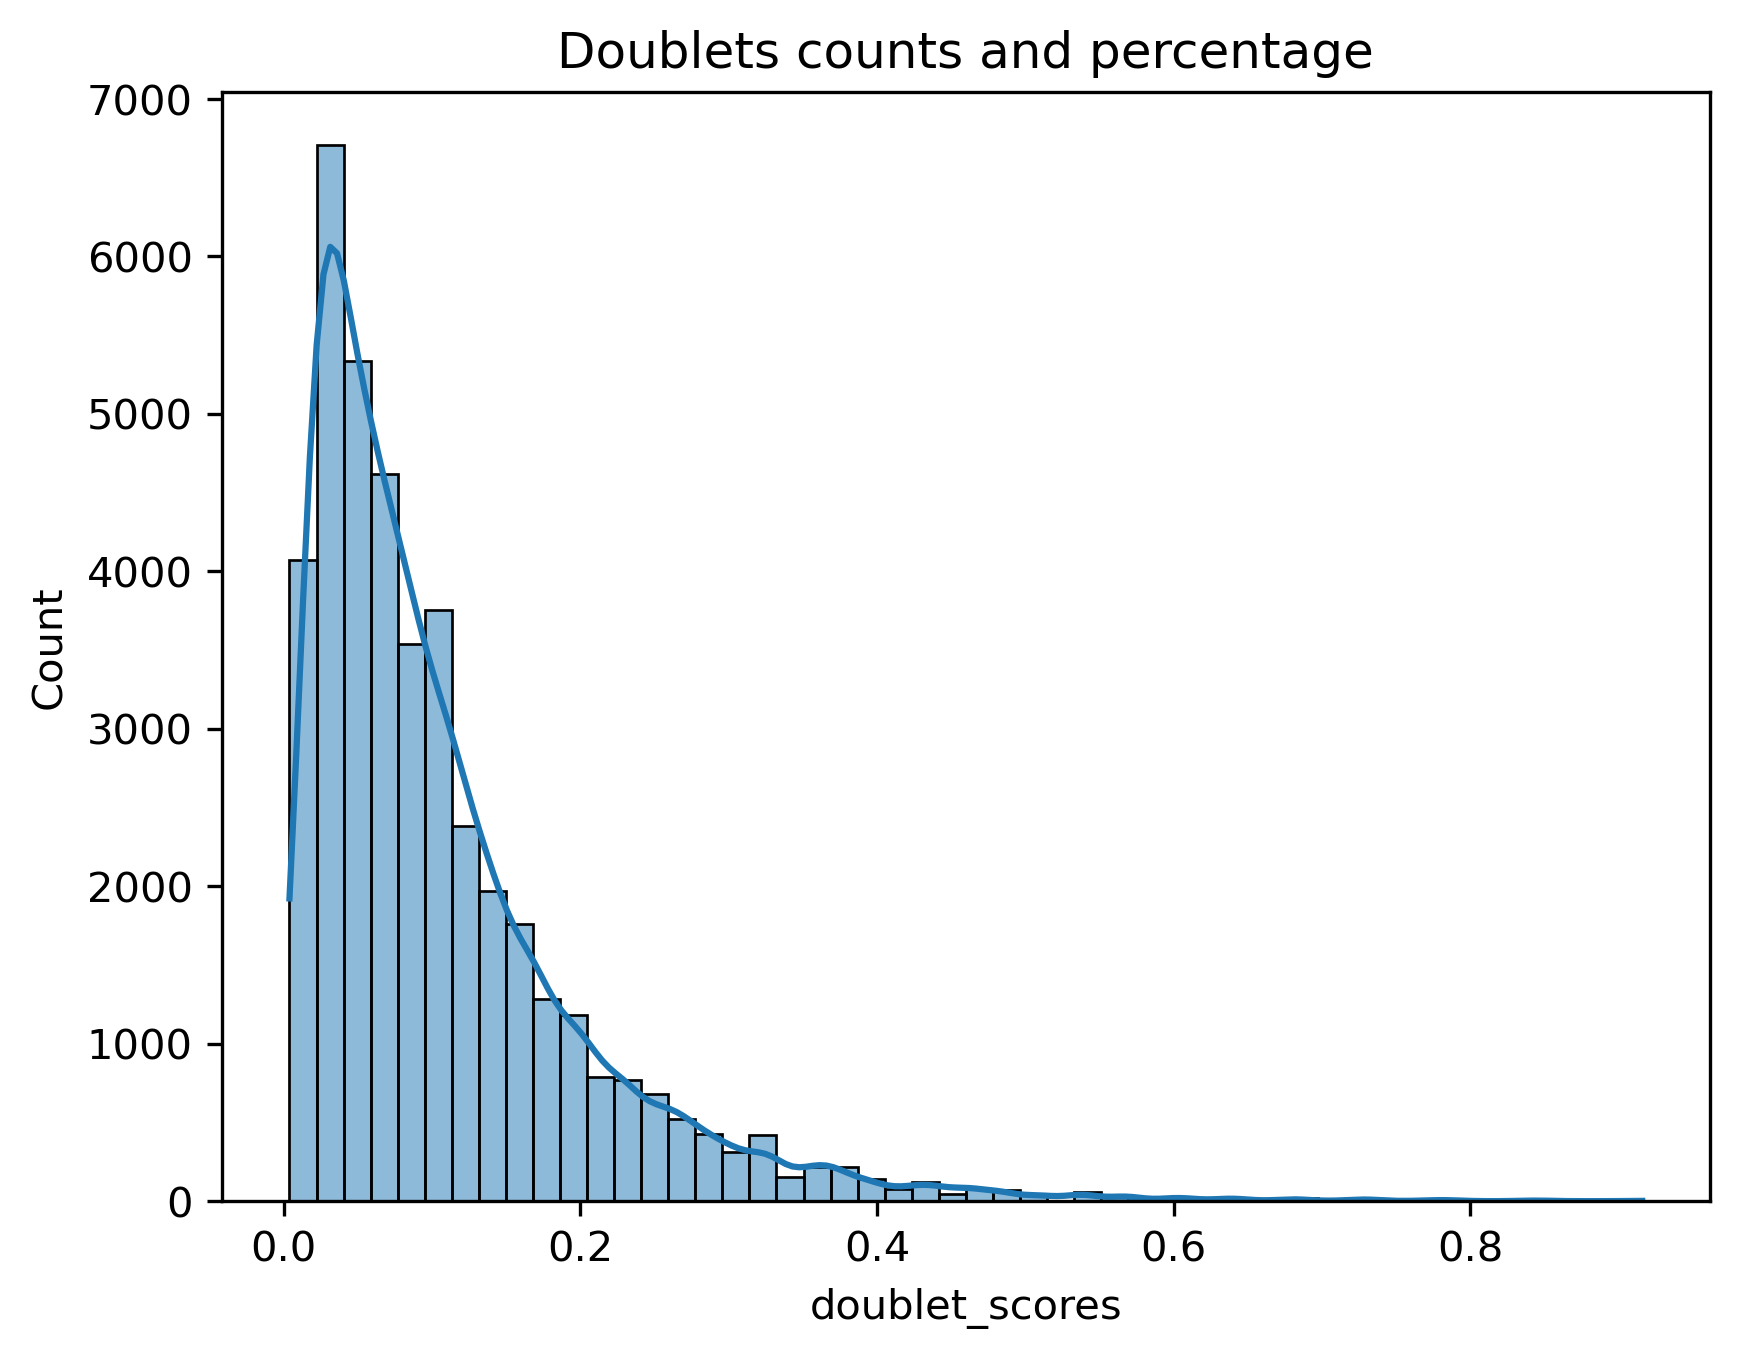

In [39]:
sb.histplot(adata.obs['doublet_scores'], bins=50, kde=True)
plt.title('Doublets counts and percentage')

### Checking the count and percentage of Doublets - Anndata level

In [40]:
adata

AnnData object with n_obs × n_vars = 41918 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'doublet_scores', 'predicted_doublets'
    uns: 'X_name'
    layers: 'logcounts'

In [41]:
doub_tab = pd.crosstab(adata.obs['HTO_classification'],adata.obs['predicted_doublets'])
doub_tab.sum()

predicted_doublets
False    38978
True      2940
dtype: int64

In [42]:
true_doublets = adata.obs['predicted_doublets'] == True
true_doublets_count = true_doublets.sum()

true_doublets_percentage = (true_doublets_count / len(adata.obs)) * 100

true_doublets_count ,true_doublets_percentage

(np.int64(2940), np.float64(7.013693401402739))

# Comparision of Biological doublets and Hashtag doublets

### Checking the count of Doublets - Broad level

In [43]:
doublet_counts_per_HTO_classification = adata.obs.groupby(['HTO_classification'])['predicted_doublets'].sum().reset_index()
doublet_counts_per_HTO_classification.rename(columns={'predicted_doublets': 'Doublet_Count'}, inplace=True)
print(doublet_counts_per_HTO_classification)

       HTO_classification Doublet_Count
0                Negative          1611
1              TotalSeqB1             0
2   TotalSeqB1_TotalSeqB3           241
3   TotalSeqB1_TotalSeqB4             2
4   TotalSeqB1_TotalSeqB5             7
5   TotalSeqB1_TotalSeqB6             1
6   TotalSeqB1_TotalSeqB7             3
7   TotalSeqB1_TotalSeqB8             2
8   TotalSeqB1_TotalSeqB9             9
9              TotalSeqB3             4
10  TotalSeqB3_TotalSeqB4             4
11  TotalSeqB3_TotalSeqB5             4
12  TotalSeqB3_TotalSeqB6             1
13  TotalSeqB3_TotalSeqB7             5
14  TotalSeqB3_TotalSeqB8             4
15  TotalSeqB3_TotalSeqB9             2
16             TotalSeqB4             1
17  TotalSeqB4_TotalSeqB5             4
18  TotalSeqB4_TotalSeqB6             8
19  TotalSeqB4_TotalSeqB7            12
20  TotalSeqB4_TotalSeqB8             8
21  TotalSeqB4_TotalSeqB9             3
22             TotalSeqB5             3
23  TotalSeqB5_TotalSeqB6             5


/tmp/ipykernel_1549791/686936879.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  doublet_counts_per_HTO_classification = adata.obs.groupby(['HTO_classification'])['predicted_doublets'].sum().reset_index()


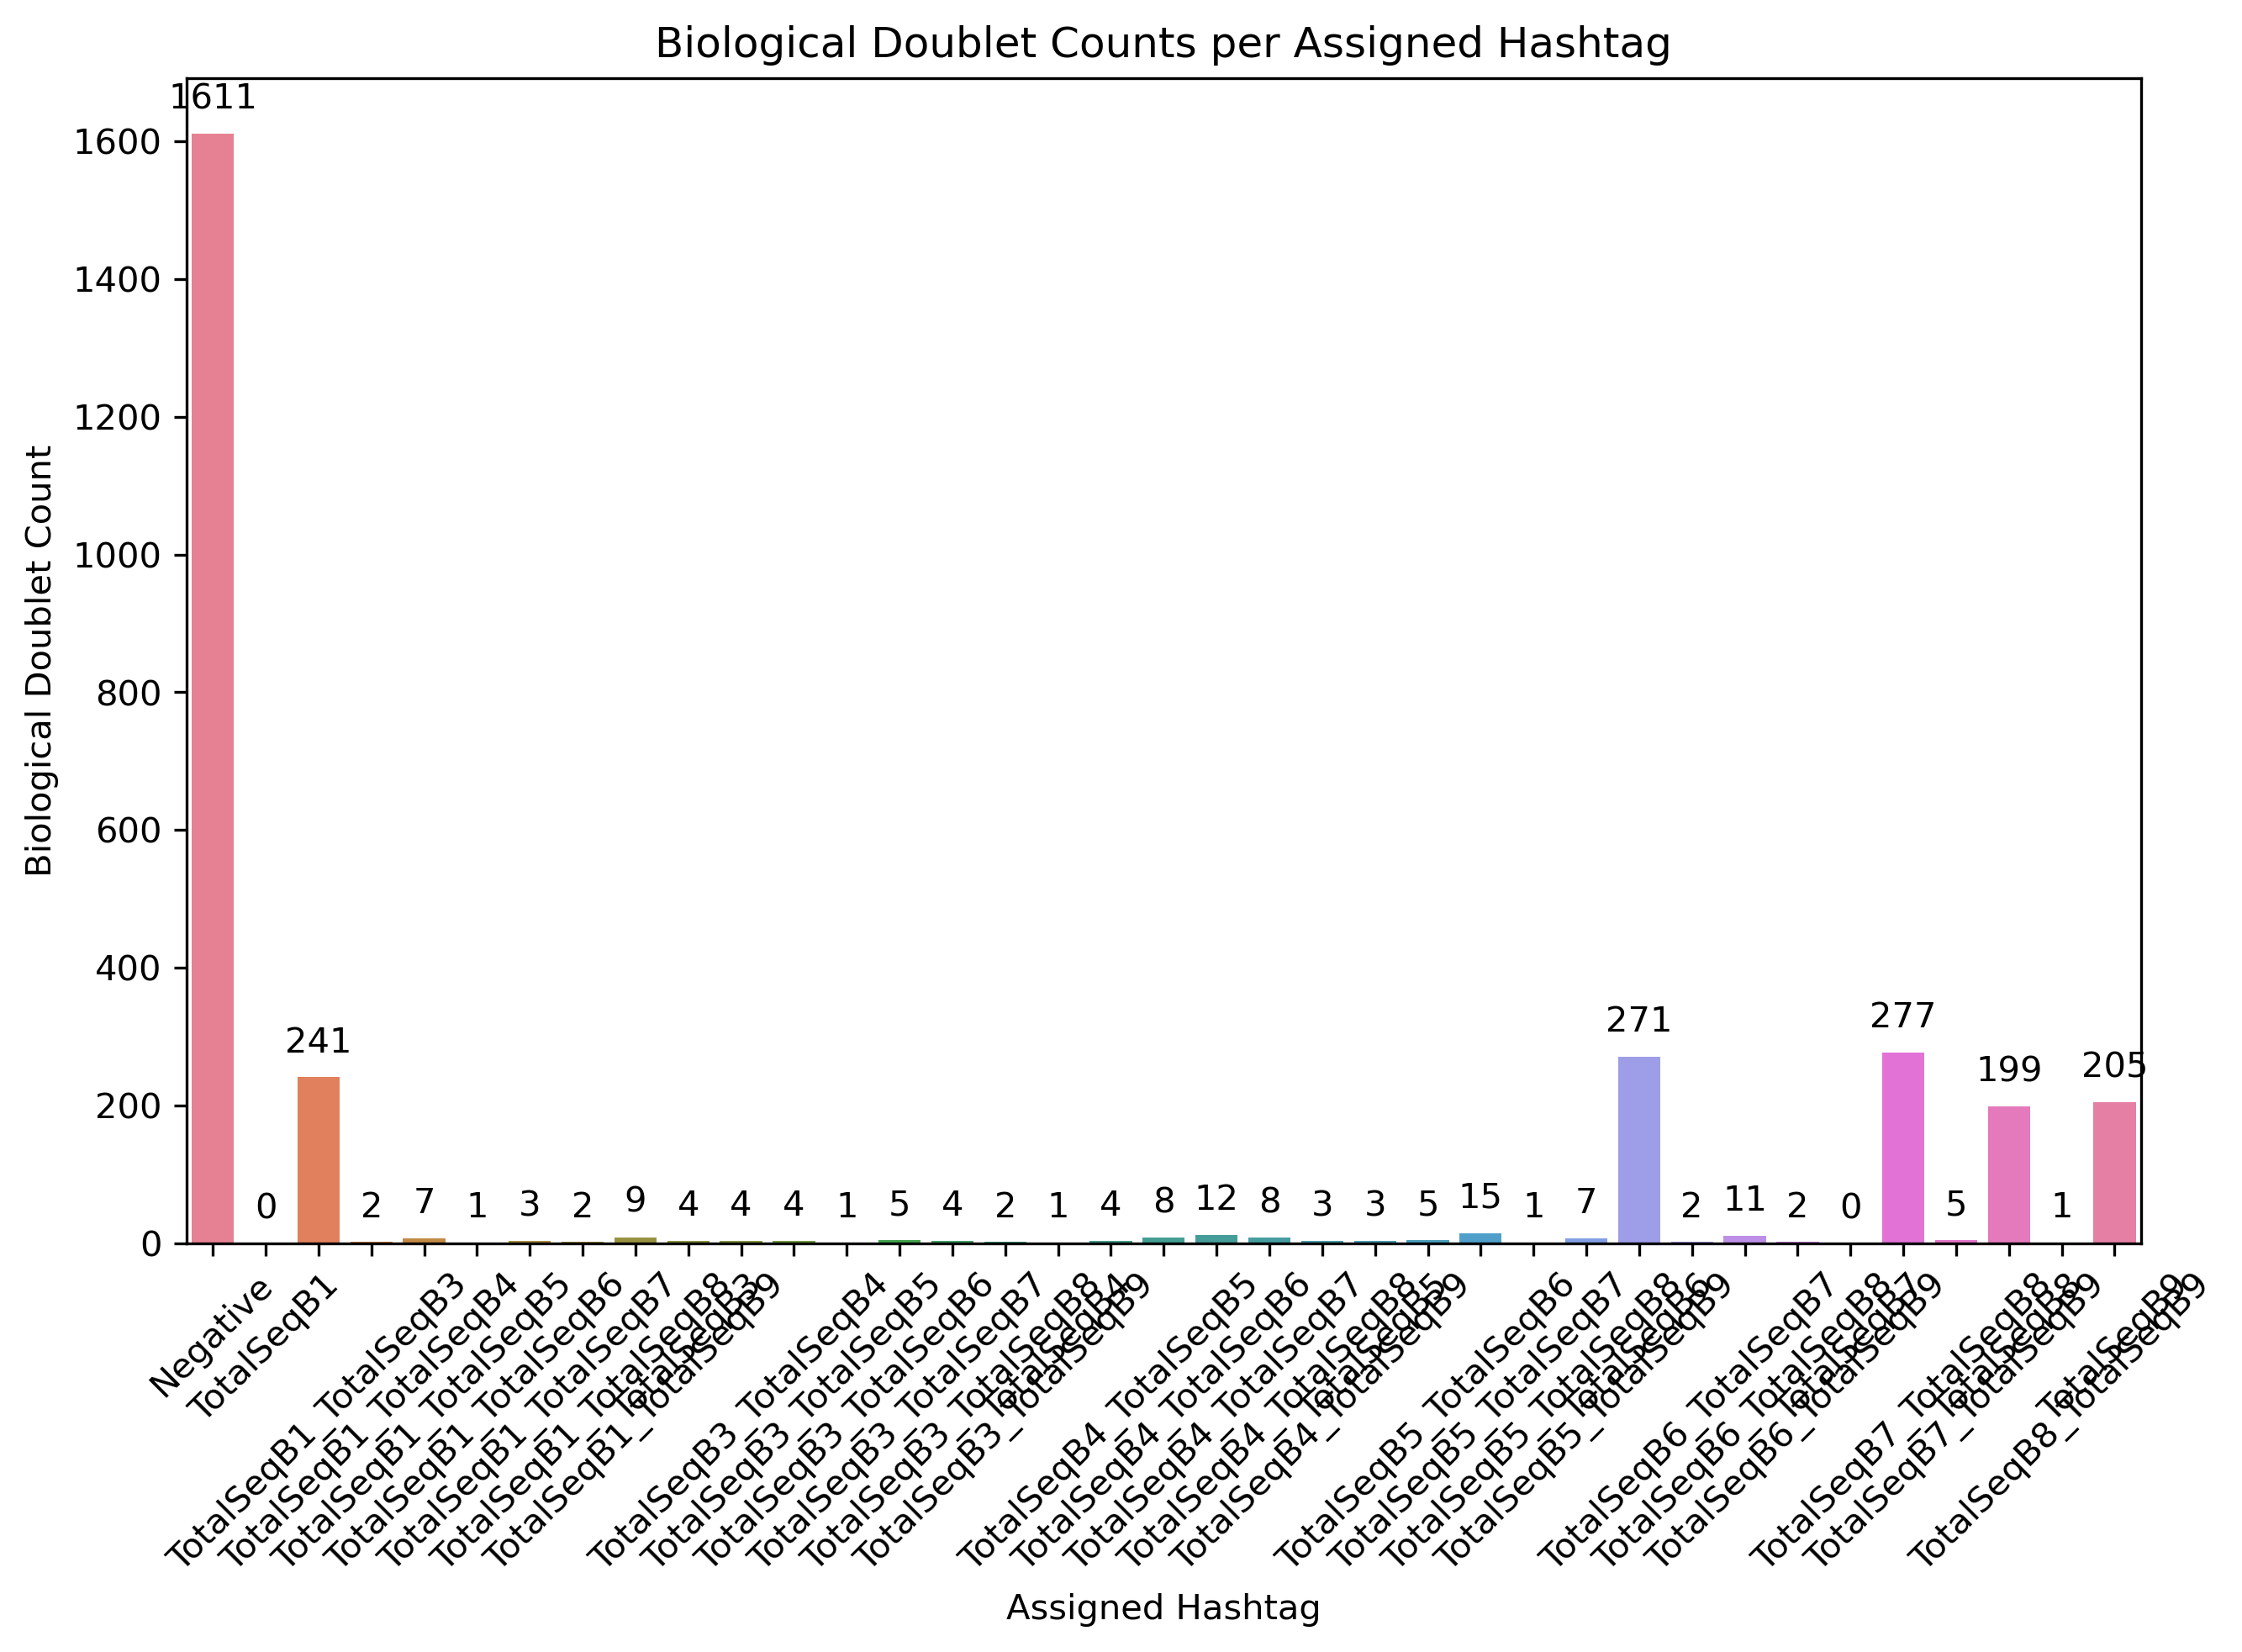

In [44]:
plt.figure(figsize=(10, 6))

ax = sb.barplot(data=doublet_counts_per_HTO_classification, x='HTO_classification', y='Doublet_Count', hue='HTO_classification')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel("Assigned Hashtag")
plt.ylabel("Biological Doublet Count")
plt.title("Biological Doublet Counts per Assigned Hashtag")
plt.show()

### Checking the count of Doublets - Global level

In [45]:
doublet_counts_per_HTO_classification_global = adata.obs.groupby(['HTO_classification.global'])['predicted_doublets'].sum().reset_index()
doublet_counts_per_HTO_classification_global.rename(columns={'predicted_doublets': 'Doublet_Count'}, inplace=True)
print(doublet_counts_per_HTO_classification_global)

  HTO_classification.global Doublet_Count
0                   Doublet           646
1                  Negative          1611
2                   Singlet           683


/tmp/ipykernel_1549791/416960753.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  doublet_counts_per_HTO_classification_global = adata.obs.groupby(['HTO_classification.global'])['predicted_doublets'].sum().reset_index()


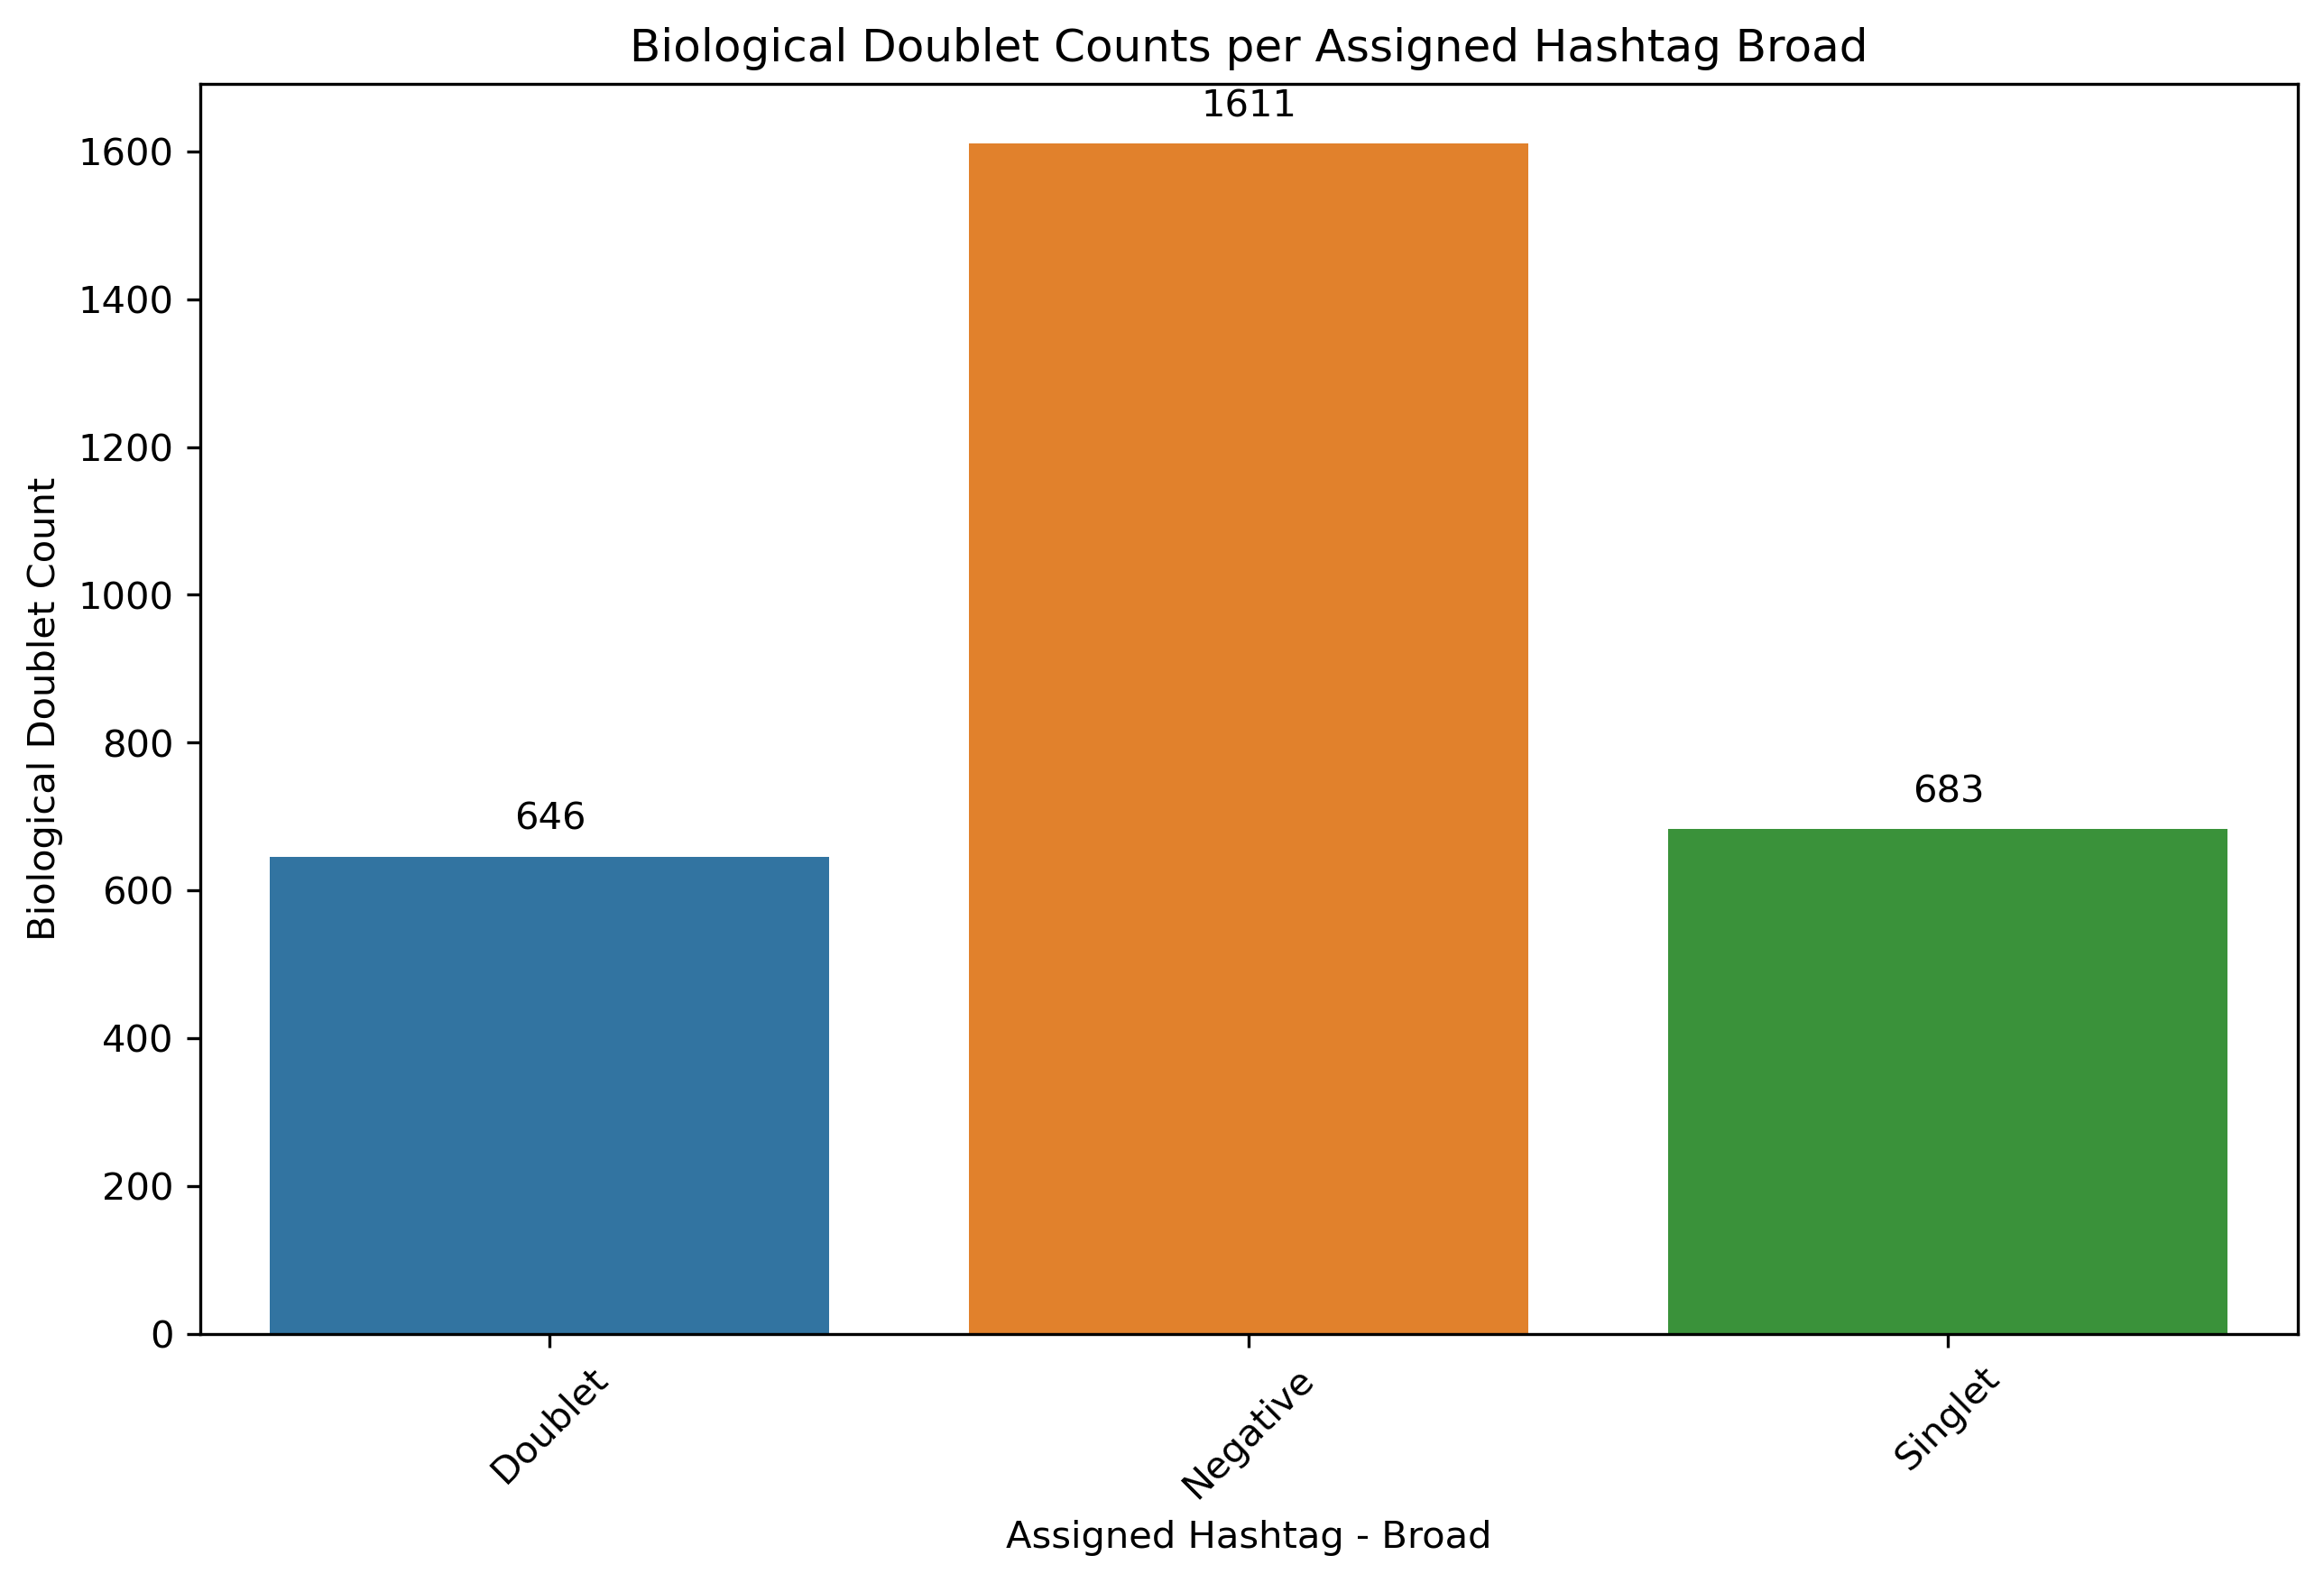

In [46]:
plt.figure(figsize=(10, 6))

ax = sb.barplot(data=doublet_counts_per_HTO_classification_global, x='HTO_classification.global', y='Doublet_Count', hue='HTO_classification.global')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel("Assigned Hashtag - Broad")
plt.ylabel("Biological Doublet Count")
plt.title("Biological Doublet Counts per Assigned Hashtag Broad")
plt.show()

### Checking the count of Doublets - Hashtag level

In [47]:
singlets = adata[adata.obs['HTO_classification.global'] == 'Singlet']
singlets

View of AnnData object with n_obs × n_vars = 13998 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'doublet_scores', 'predicted_doublets'
    uns: 'X_name'
    layers: 'logcounts'

In [48]:
singlets_doublet_counts_per_HTO_classification_global = singlets.obs.groupby(['HTO_classification'])['predicted_doublets'].sum().reset_index()
singlets_doublet_counts_per_HTO_classification_global.rename(columns={'predicted_doublets': 'Doublet_Count'}, inplace=True)
print(singlets_doublet_counts_per_HTO_classification_global)

  HTO_classification Doublet_Count
0         TotalSeqB1             0
1         TotalSeqB3             4
2         TotalSeqB4             1
3         TotalSeqB5             3
4         TotalSeqB6           271
5         TotalSeqB7             0
6         TotalSeqB8           199
7         TotalSeqB9           205


/tmp/ipykernel_1549791/401395668.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  singlets_doublet_counts_per_HTO_classification_global = singlets.obs.groupby(['HTO_classification'])['predicted_doublets'].sum().reset_index()


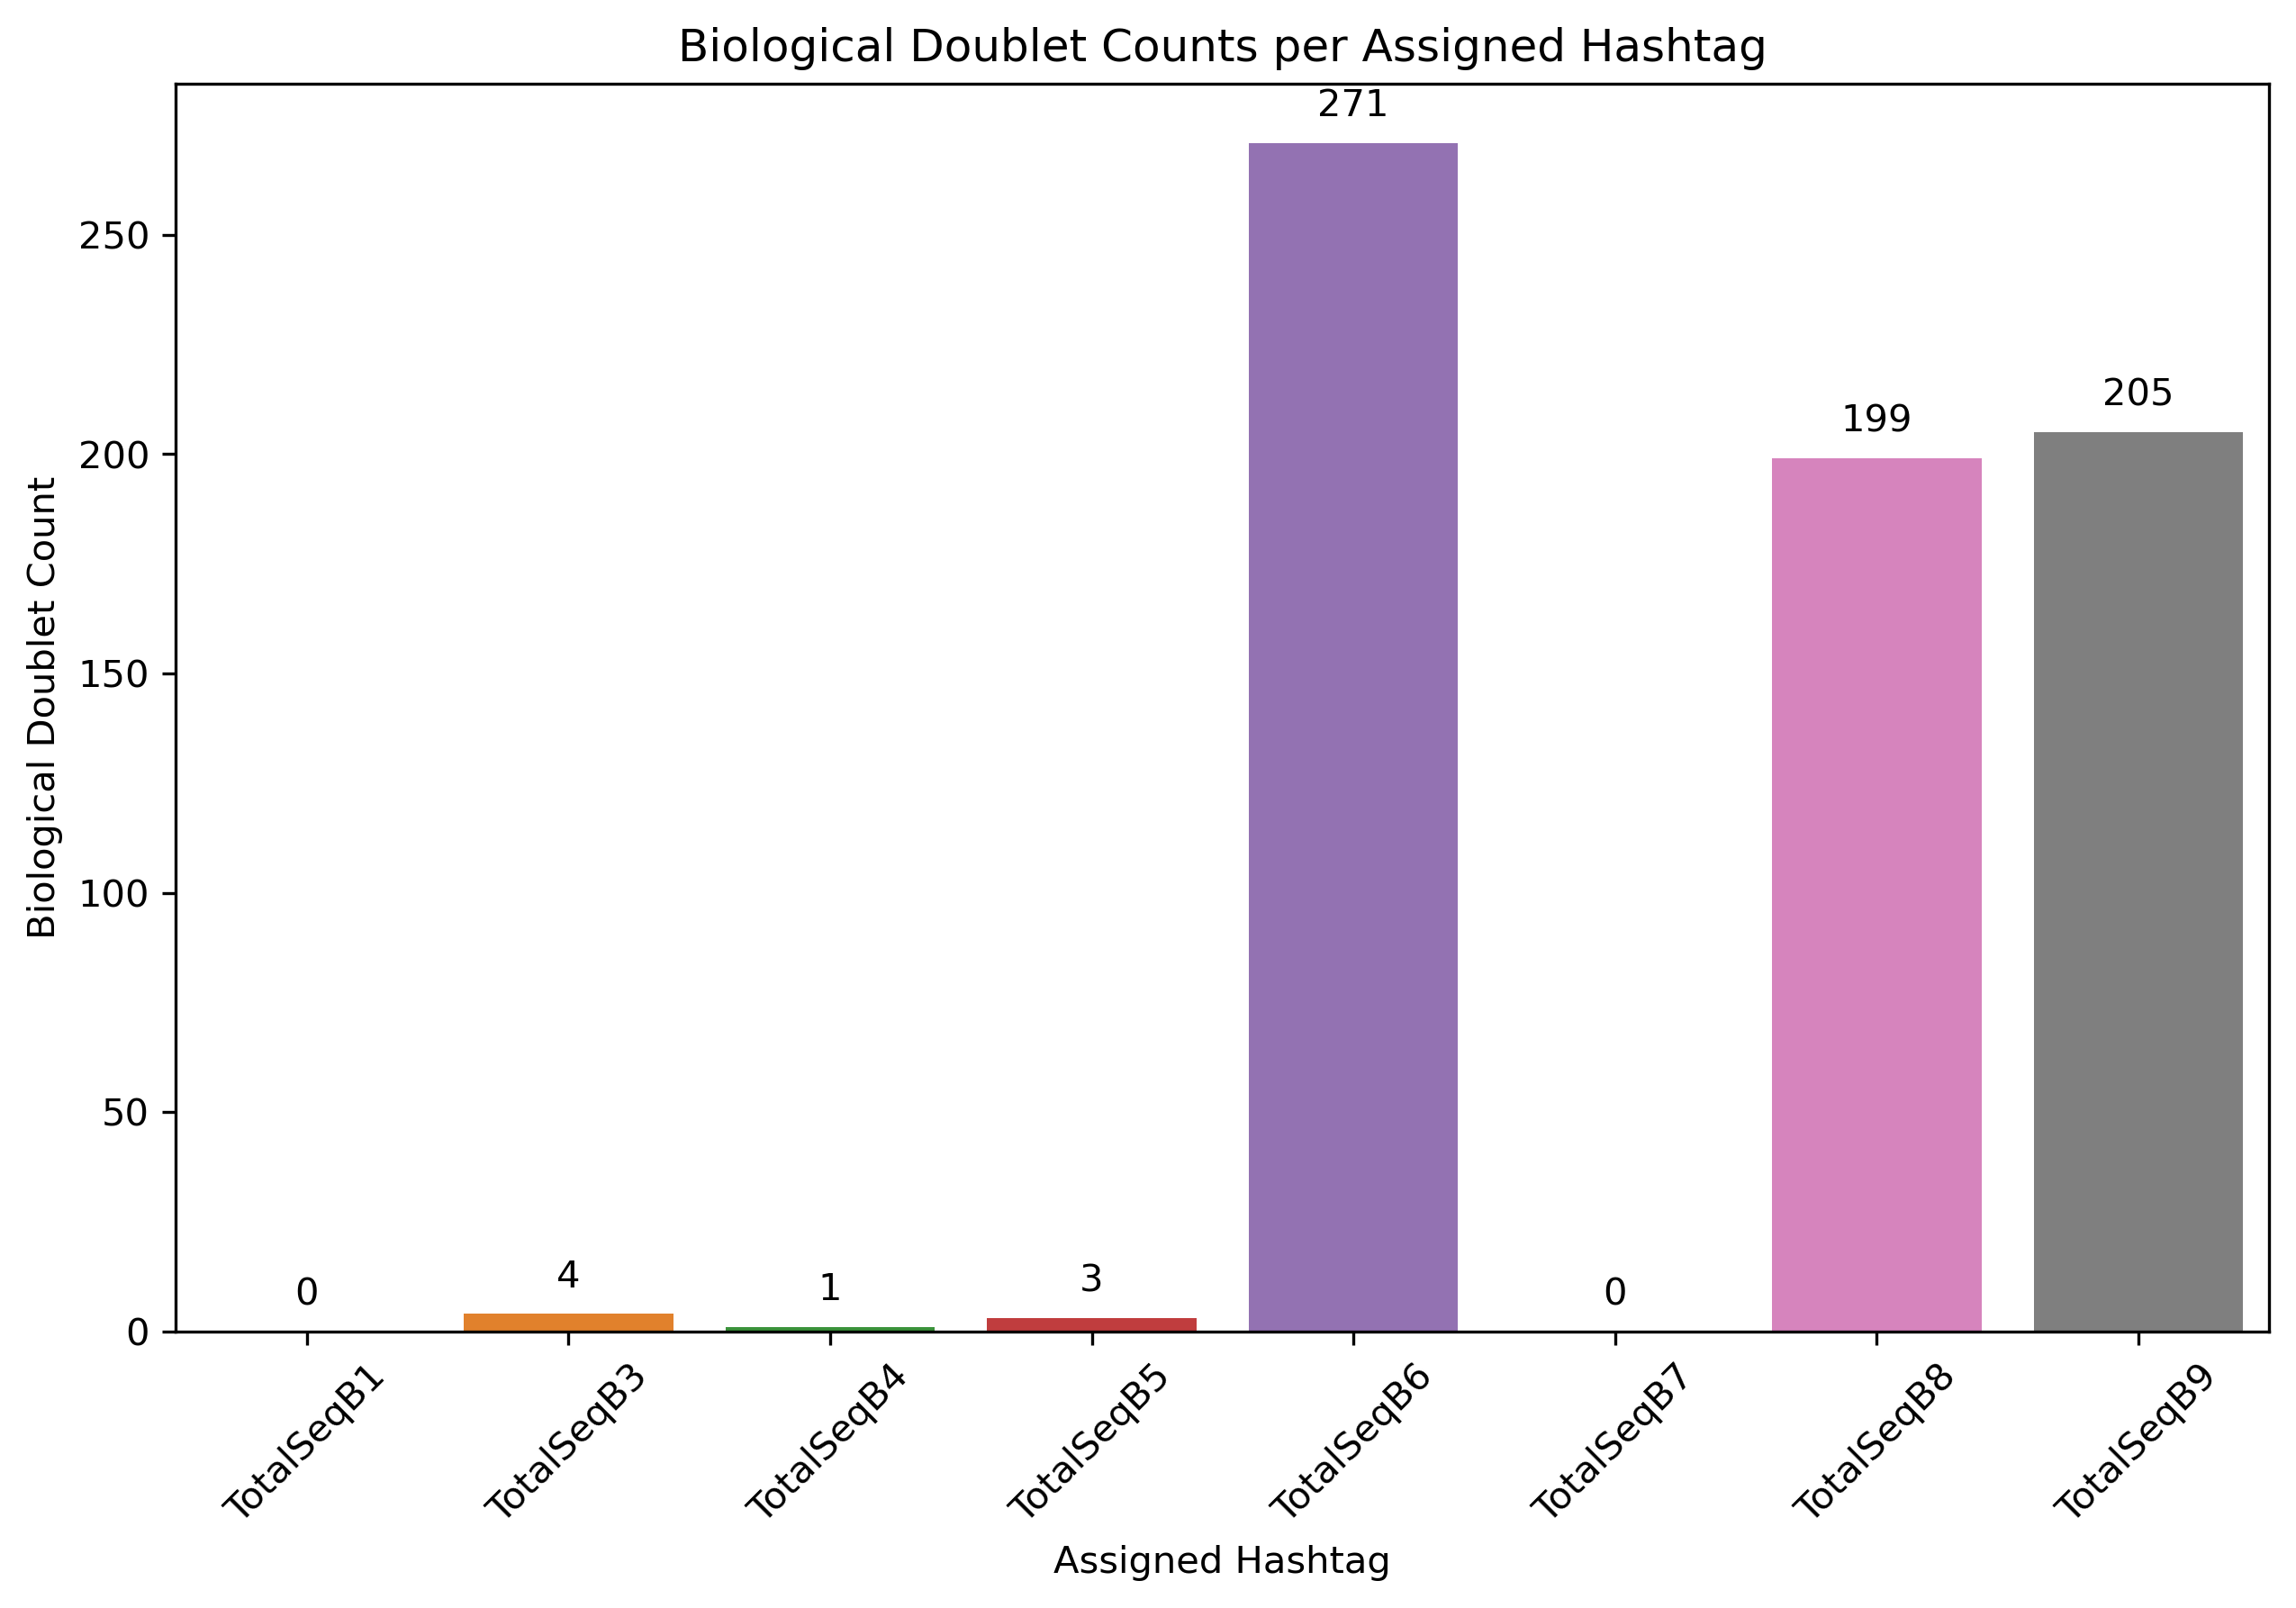

In [49]:
plt.figure(figsize=(10, 6))

ax = sb.barplot(data=singlets_doublet_counts_per_HTO_classification_global, x='HTO_classification', y='Doublet_Count', hue='HTO_classification')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel("Assigned Hashtag")
plt.ylabel("Biological Doublet Count")
plt.title("Biological Doublet Counts per Assigned Hashtag")
plt.show()

# Removal of biological deoublets having Doublet score > 0.35

In [50]:
filtered_object = adata[adata.obs['doublet_scores'] < 0.35]
filtered_object

View of AnnData object with n_obs × n_vars = 40682 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'doublet_scores', 'predicted_doublets'
    uns: 'X_name'
    layers: 'logcounts'

Text(0.5, 1.0, 'Doublets counts and percentage')

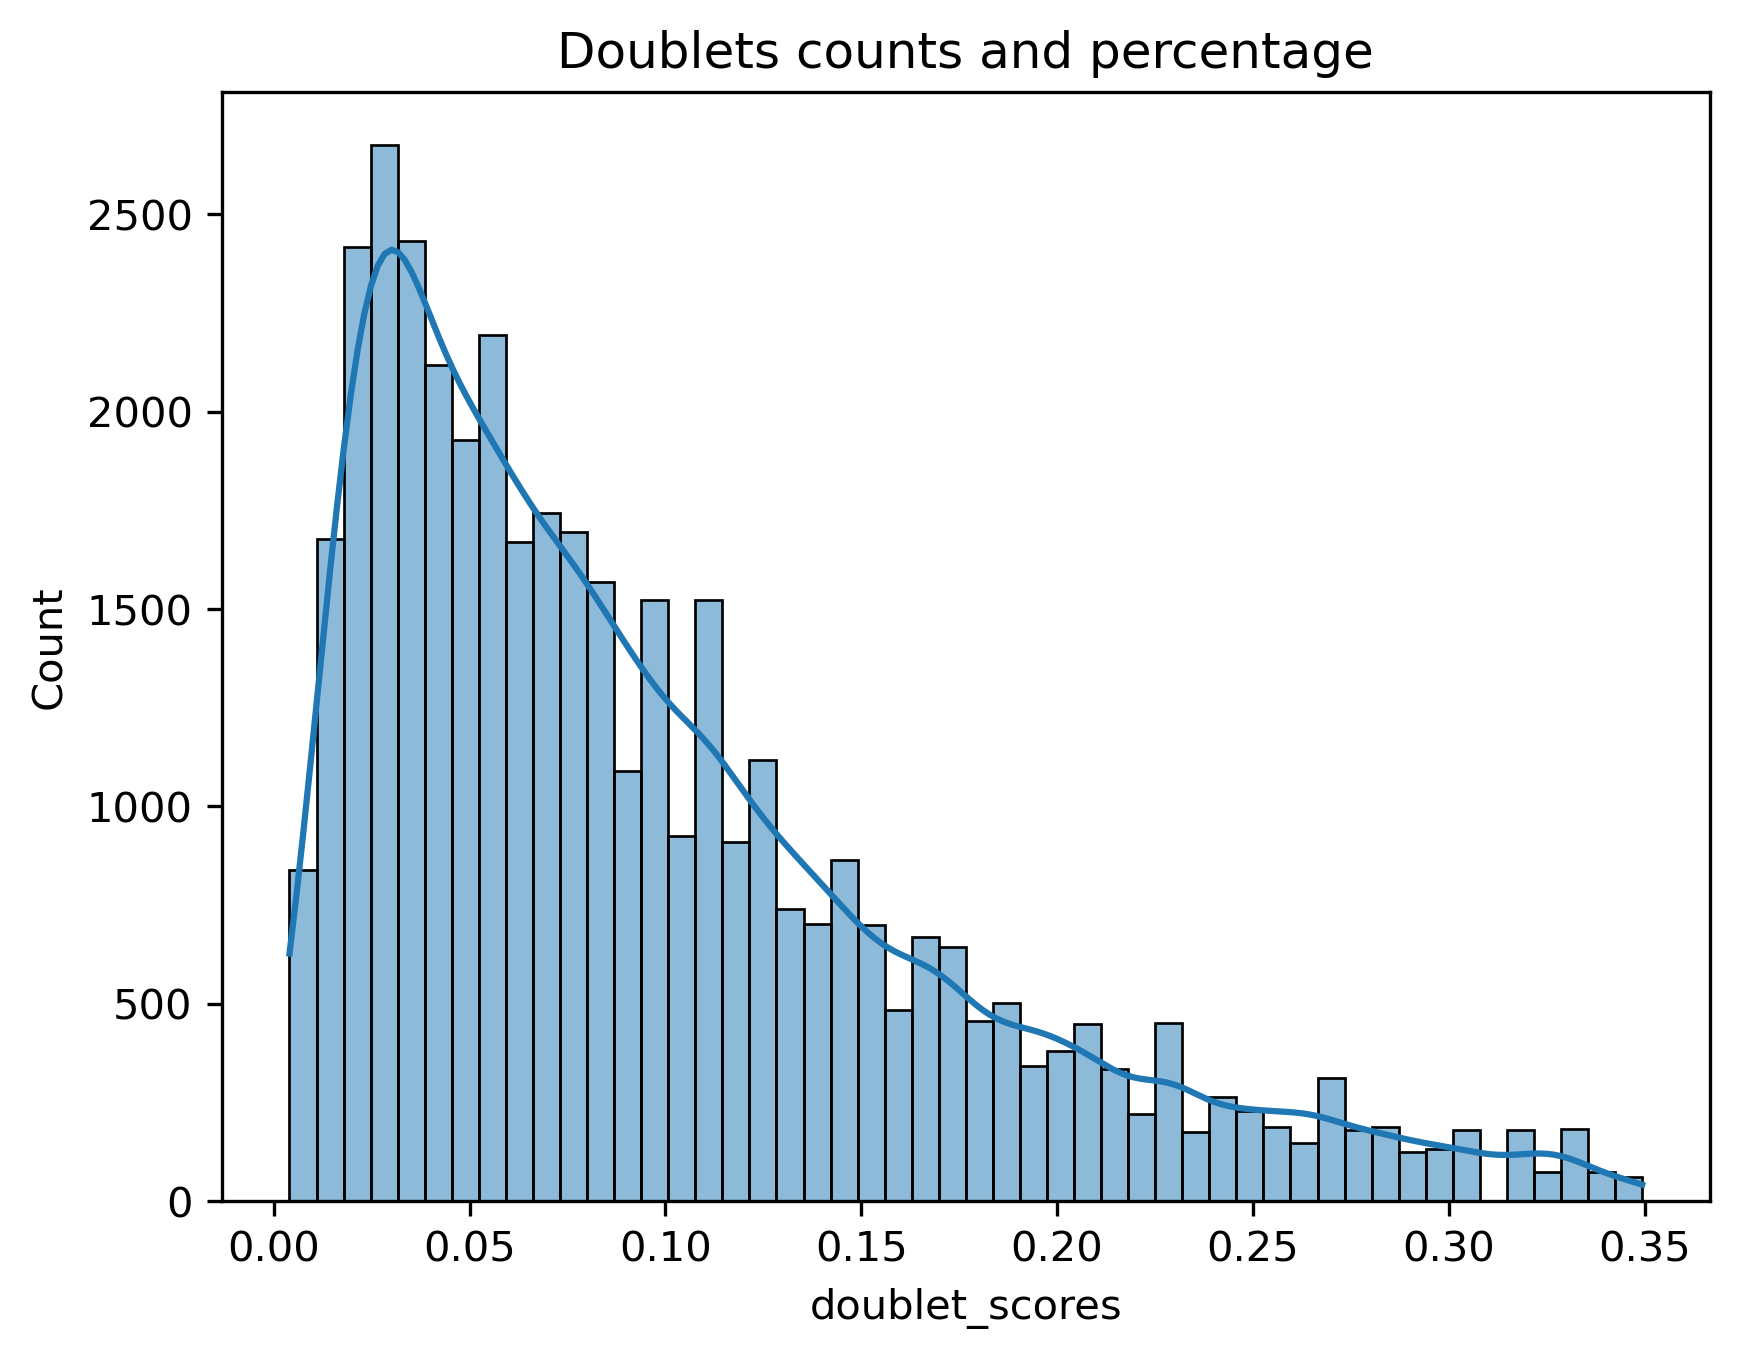

In [57]:
sb.histplot(filtered_object.obs['doublet_scores'], bins=50, kde=True)
plt.title('Doublets counts and percentage')

### Checking the count of Doublets - Global level

In [54]:
doublet_counts_per_HTO_classification_global =filtered_object.obs.groupby(['HTO_classification.global'])['predicted_doublets'].sum().reset_index()
doublet_counts_per_HTO_classification_global.rename(columns={'predicted_doublets': 'Doublet_Count'}, inplace=True)
print(doublet_counts_per_HTO_classification_global)

  HTO_classification.global Doublet_Count
0                   Doublet           526
1                  Negative           921
2                   Singlet           544


/tmp/ipykernel_1549791/1361401447.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  doublet_counts_per_HTO_classification_global =filtered_object.obs.groupby(['HTO_classification.global'])['predicted_doublets'].sum().reset_index()


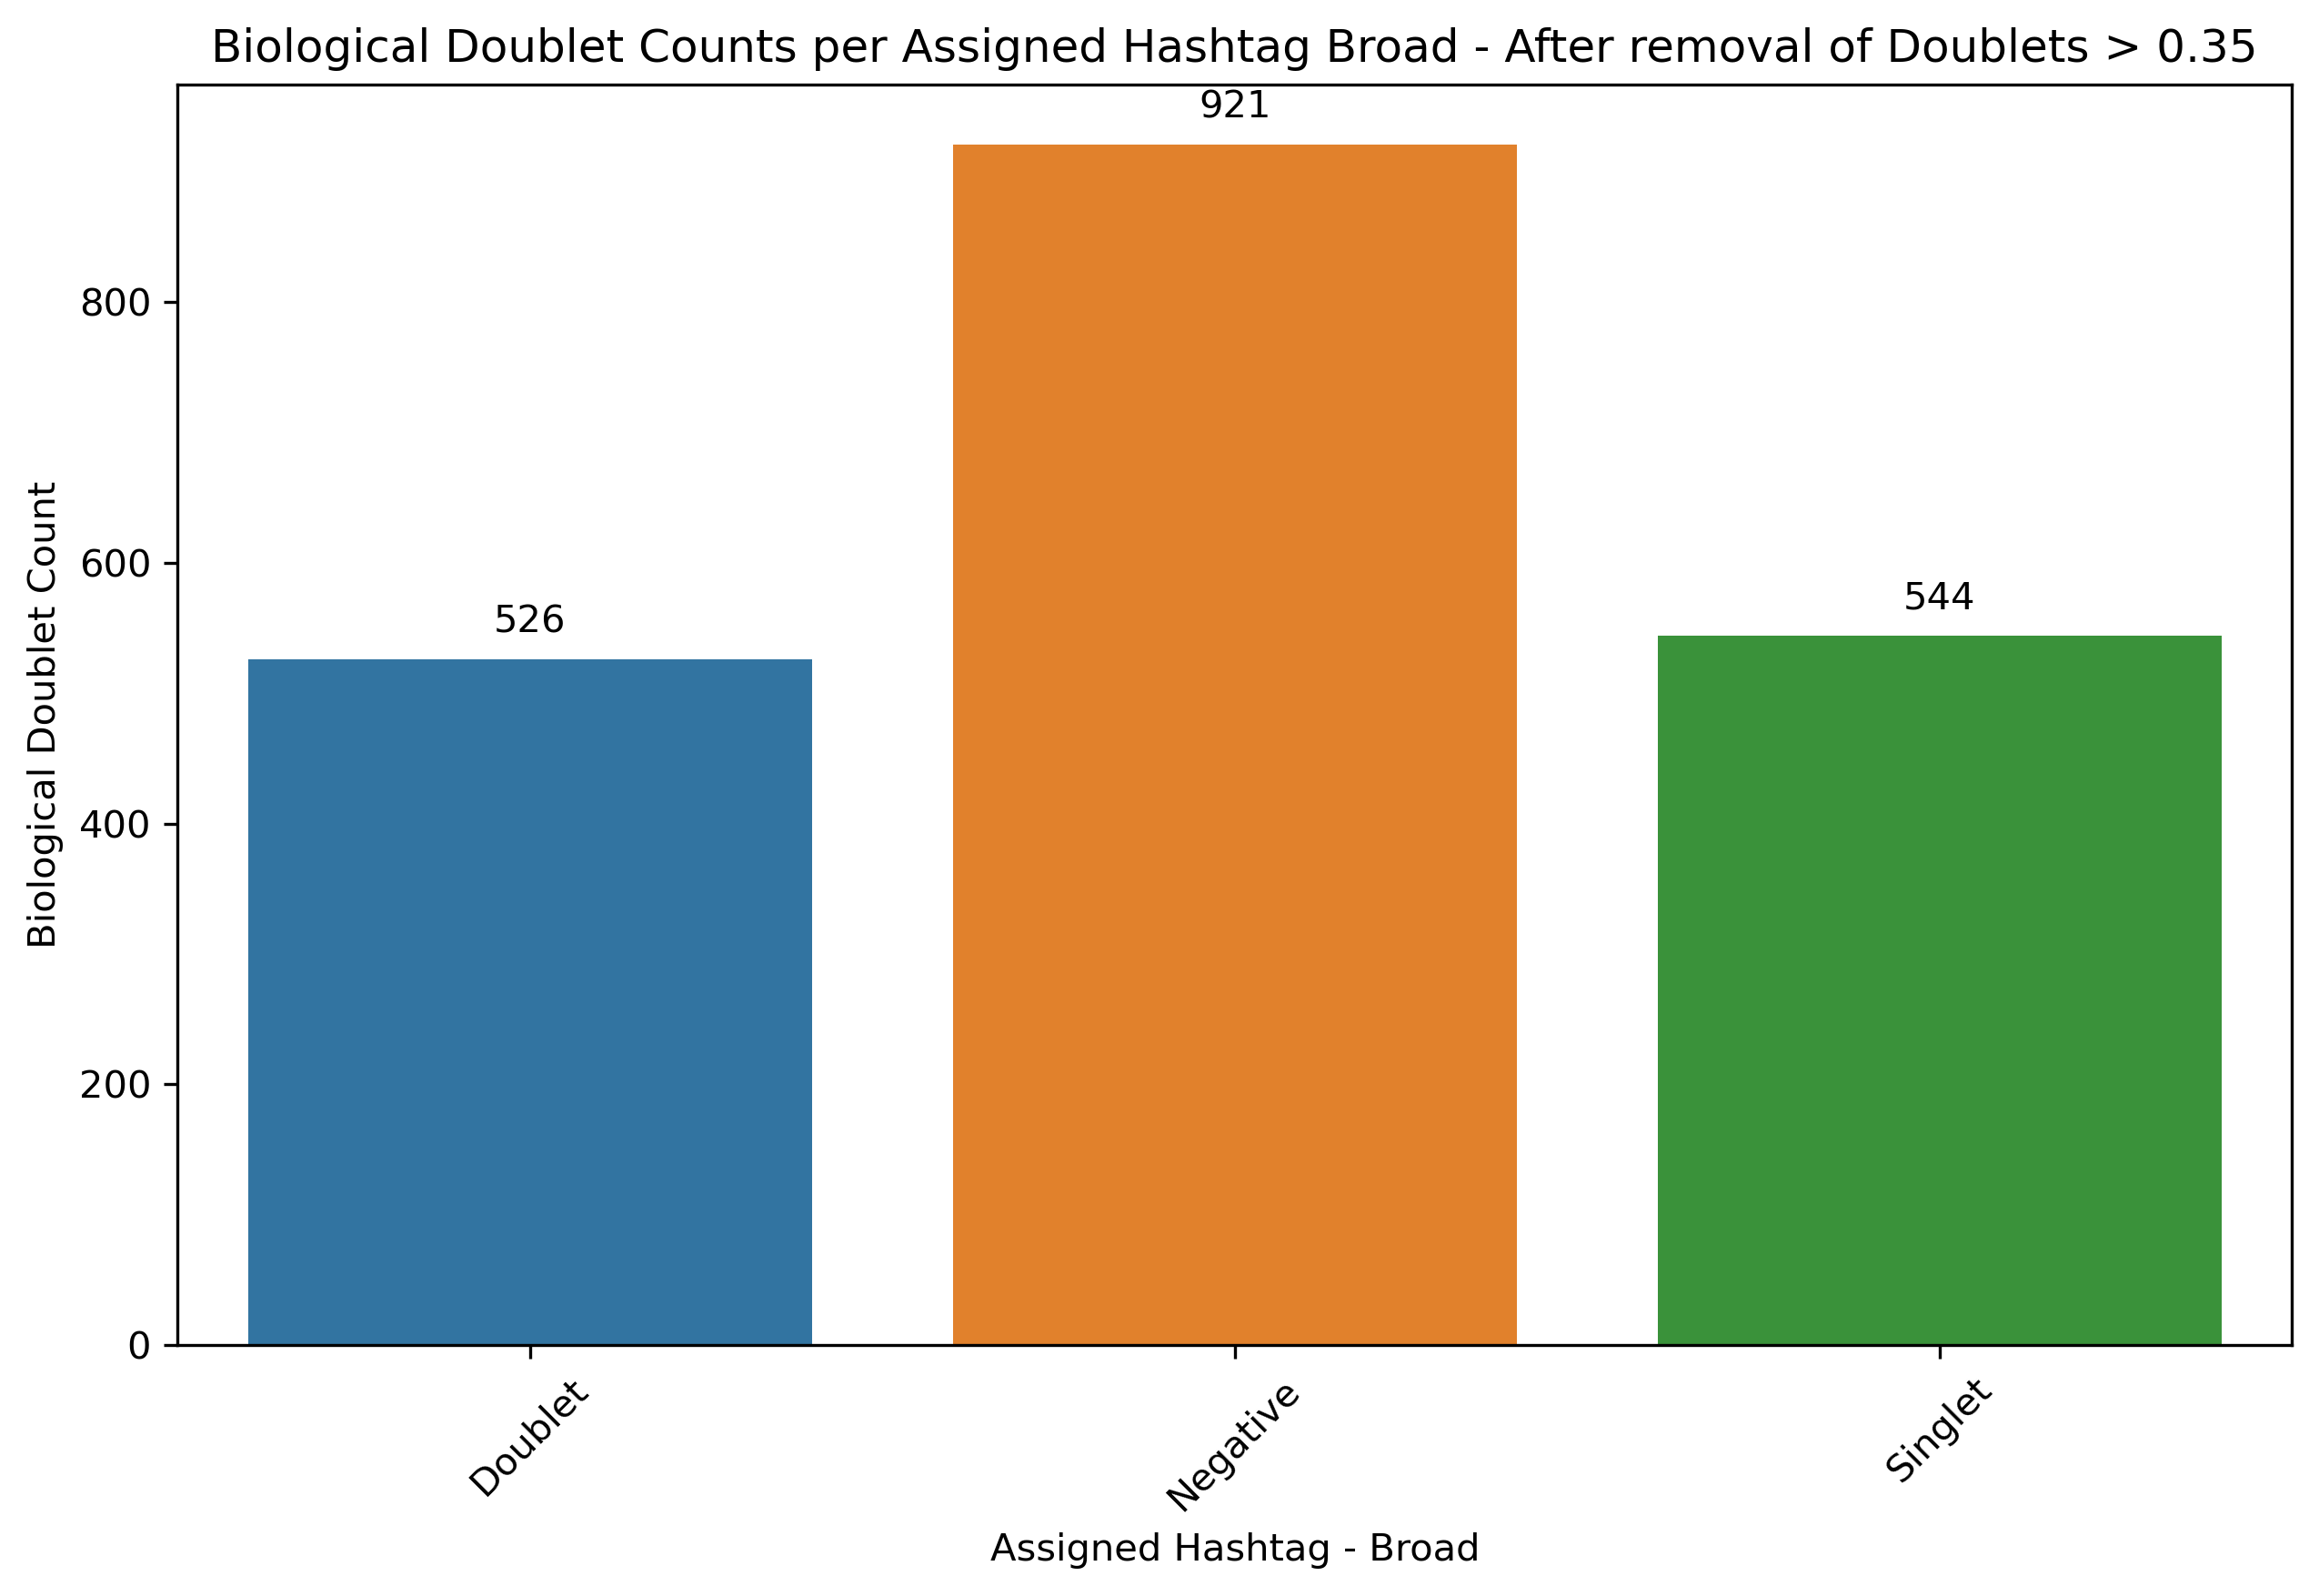

In [56]:
plt.figure(figsize=(10, 6))

ax = sb.barplot(data=doublet_counts_per_HTO_classification_global, x='HTO_classification.global', y='Doublet_Count', hue='HTO_classification.global')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel("Assigned Hashtag - Broad")
plt.ylabel("Biological Doublet Count")
plt.title("Biological Doublet Counts per Assigned Hashtag Broad - After removal of Doublets > 0.35")
plt.show()

### Checking the count of Doublets - Hashtag level

In [51]:
singlets = filtered_object[filtered_object.obs['HTO_classification.global'] == 'Singlet']
singlets

View of AnnData object with n_obs × n_vars = 13597 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'ident', 'doublet_scores', 'predicted_doublets'
    uns: 'X_name'
    layers: 'logcounts'

In [52]:
singlets_doublet_counts_per_HTO_classification_global = singlets.obs.groupby(['HTO_classification'])['predicted_doublets'].sum().reset_index()
singlets_doublet_counts_per_HTO_classification_global.rename(columns={'predicted_doublets': 'Doublet_Count'}, inplace=True)
print(singlets_doublet_counts_per_HTO_classification_global)

  HTO_classification Doublet_Count
0         TotalSeqB1             0
1         TotalSeqB3             0
2         TotalSeqB4             0
3         TotalSeqB5             0
4         TotalSeqB6           217
5         TotalSeqB7             0
6         TotalSeqB8           145
7         TotalSeqB9           182


/tmp/ipykernel_1549791/401395668.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  singlets_doublet_counts_per_HTO_classification_global = singlets.obs.groupby(['HTO_classification'])['predicted_doublets'].sum().reset_index()


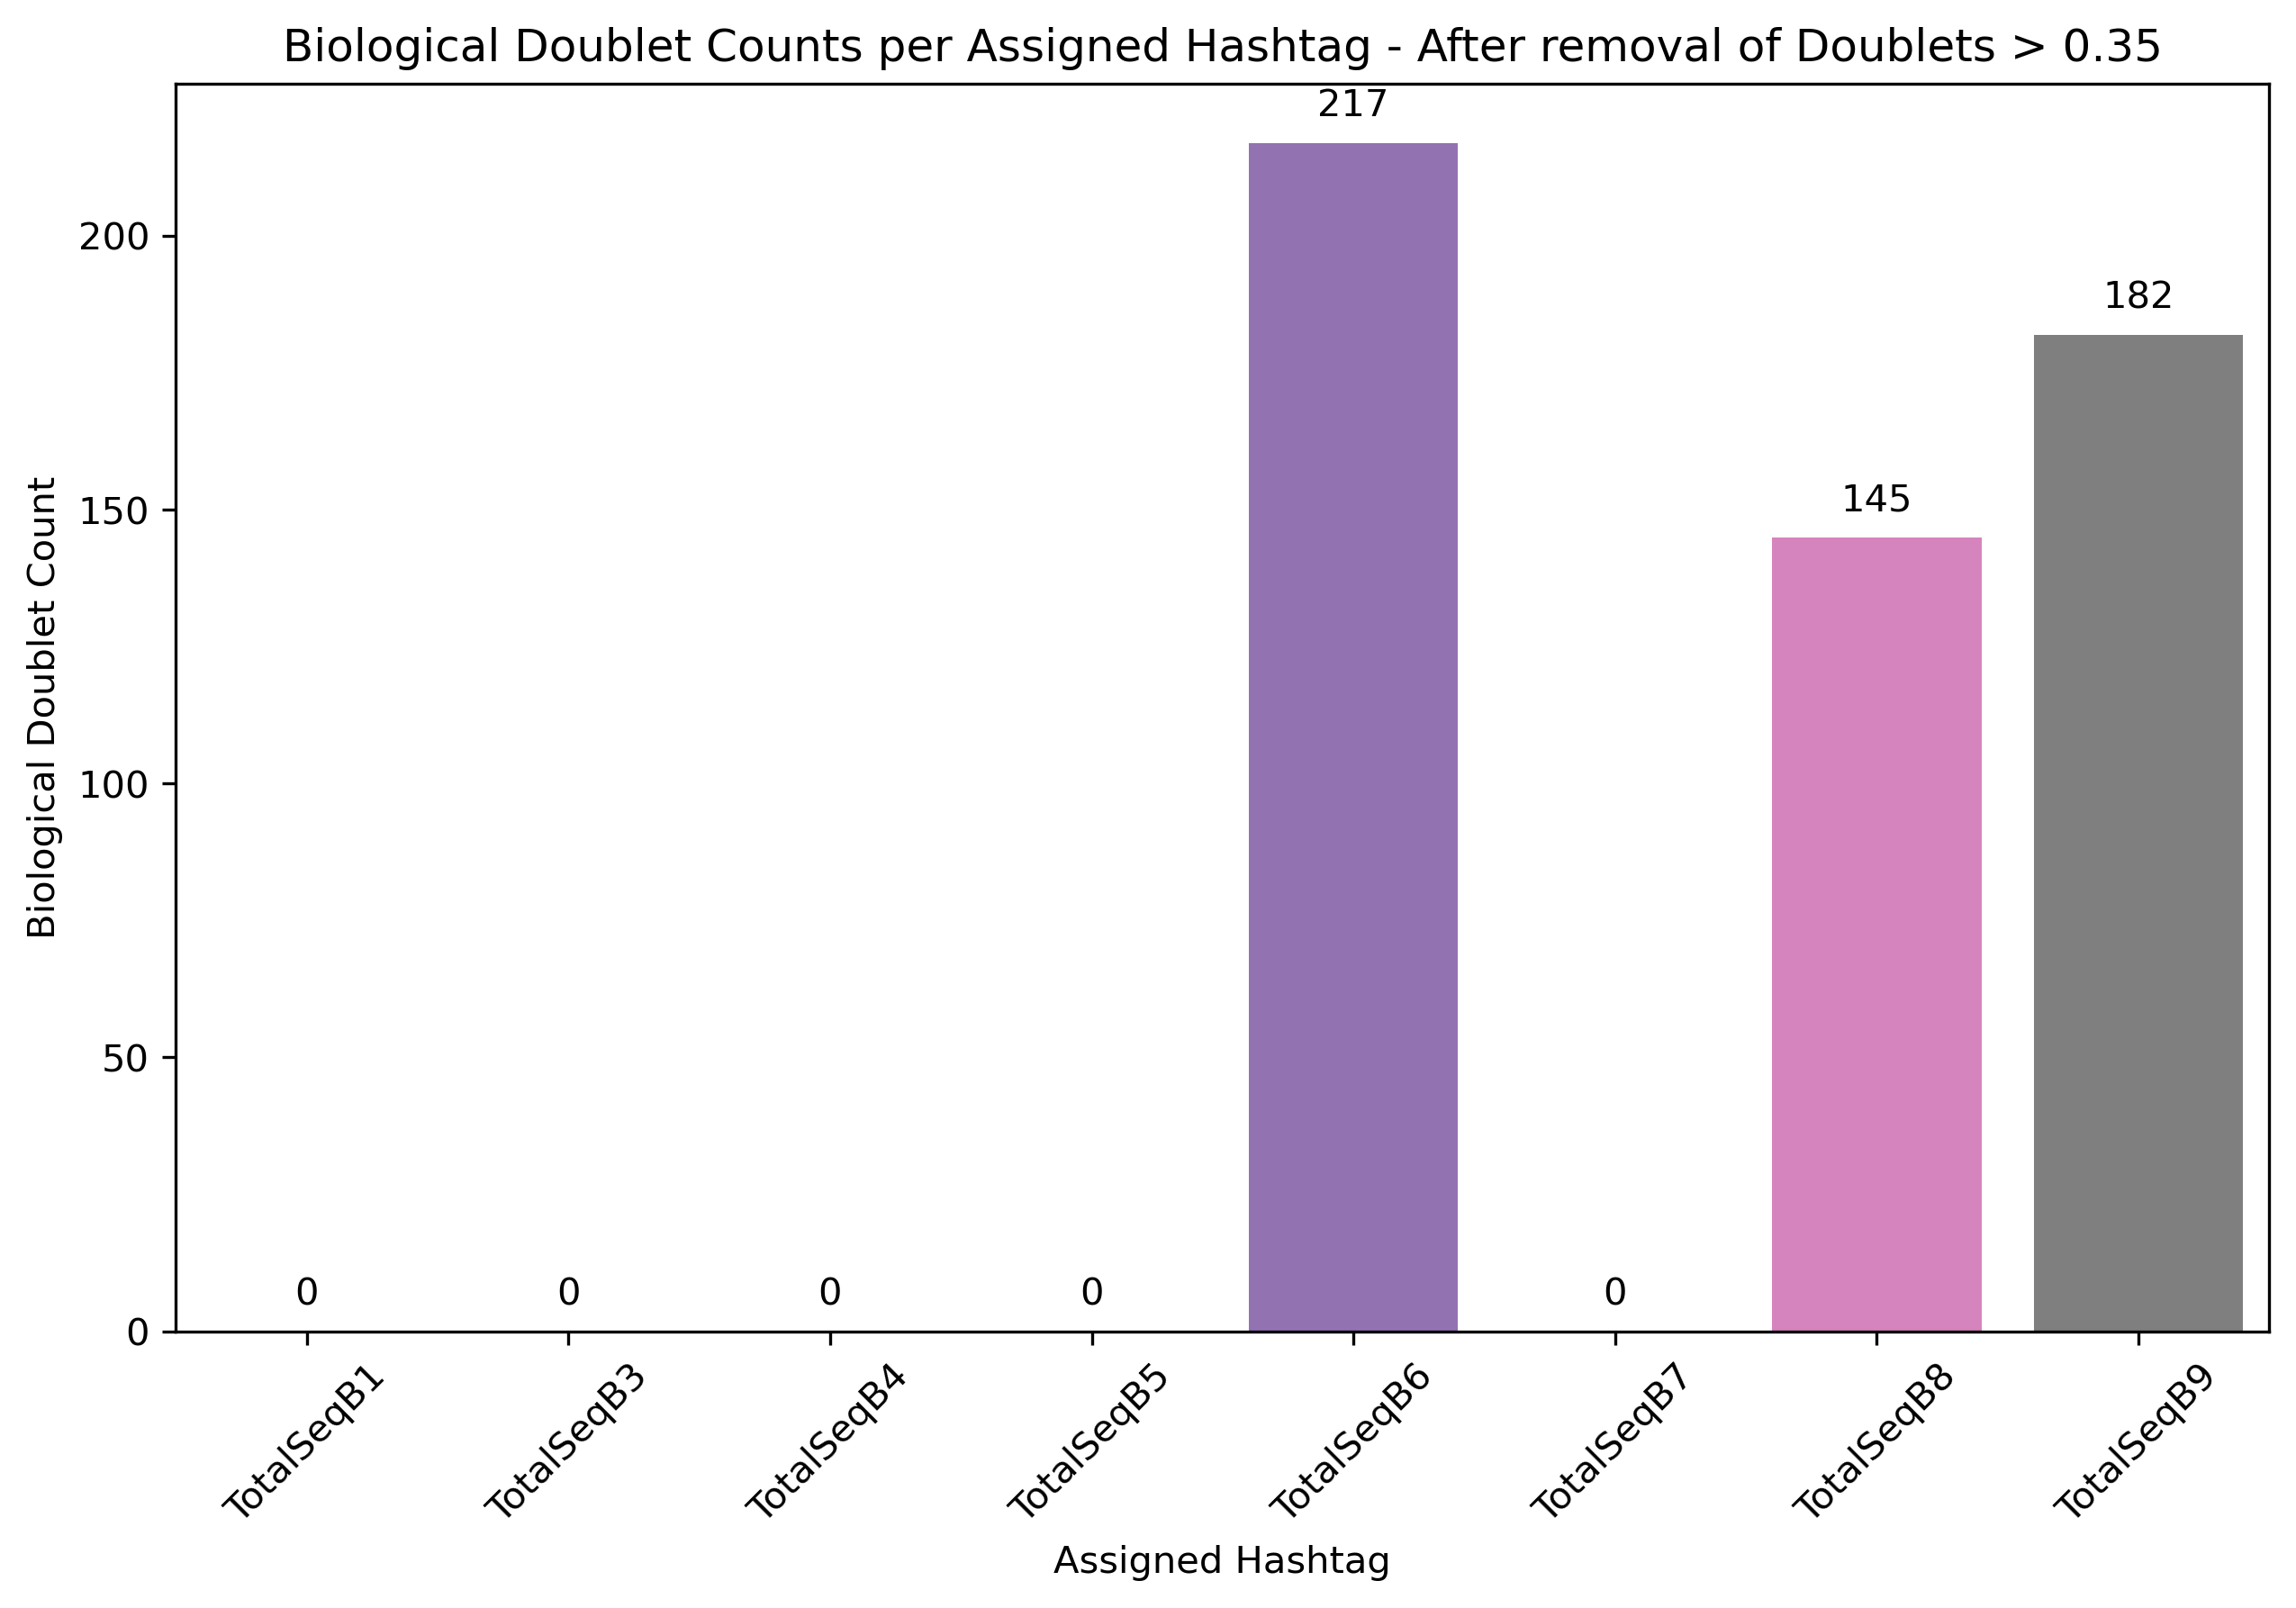

In [53]:
plt.figure(figsize=(10, 6))

ax = sb.barplot(data=singlets_doublet_counts_per_HTO_classification_global, x='HTO_classification', y='Doublet_Count', hue='HTO_classification')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)
plt.xlabel("Assigned Hashtag")
plt.ylabel("Biological Doublet Count")
plt.title("Biological Doublet Counts per Assigned Hashtag - After removal of Doublets > 0.35")
plt.show()

## Data Export

In [59]:
filtered_object.obs.dtypes

orig.ident                   category
nCount_RNA                    float64
nFeature_RNA                    int32
nCount_HTO                    float64
nFeature_HTO                    int32
HTO_maxID                    category
HTO_secondID                 category
HTO_margin                    float64
HTO_classification           category
HTO_classification.global    category
hash.ID                      category
ident                        category
doublet_scores                float64
predicted_doublets             object
dtype: object

In [61]:
filtered_object.obs['predicted_doublets'] = filtered_object.obs['predicted_doublets'].astype(int)

/tmp/ipykernel_1549791/105648261.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  filtered_object.obs['predicted_doublets'] = filtered_object.obs['predicted_doublets'].astype(int)


In [62]:
filtered_object.write_h5ad(f'./Github/Nuclear_hashing_2025/data/filtered_scrublet_doublets_after_annotation_HTODemux_{timestamp}.h5ad')